<a href="https://colab.research.google.com/github/VatsalyaDubey16/Classification/blob/main/Classification_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with Tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-03-15 10:59:39.780056


## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a toy dataset for binary classification
X,y = make_classification(n_samples =1000,
                          n_features = 2,
                          n_clusters_per_class = 2,
                          n_informative =2,
                          random_state =72,
                          n_redundant = 0)

In [ ]:
# Check out the feature
X

array([[-2.28414034,  1.22030477],
       [-1.8918588 ,  1.85776791],
       [ 0.96117519, -0.16970999],
       ...,
       [-0.52457569, -0.78823892],
       [-1.73140003,  1.43348534],
       [-0.56732224,  0.41452693]])

In [ ]:
# Check out labels
y[:10]

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
# Make dataframe of features and labels
cluster = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "labels": y})
cluster.head()

,X0,X1,labels
0,-2.284140,1.220305,0
1,-1.891859,1.857768,0
2,0.961175,-0.169710,1
3,-1.960122,-1.239099,0
4,1.203469,-0.820276,1


In [ ]:
# Check out the different labels
cluster.labels.value_counts()

0    501
1    499
Name: labels, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Features for training
# X_test: Features for testing
# y_train: Labels for training
# y_test: Labels for testing


In [ ]:
len(X_train), len(X_test)

(800, 200)

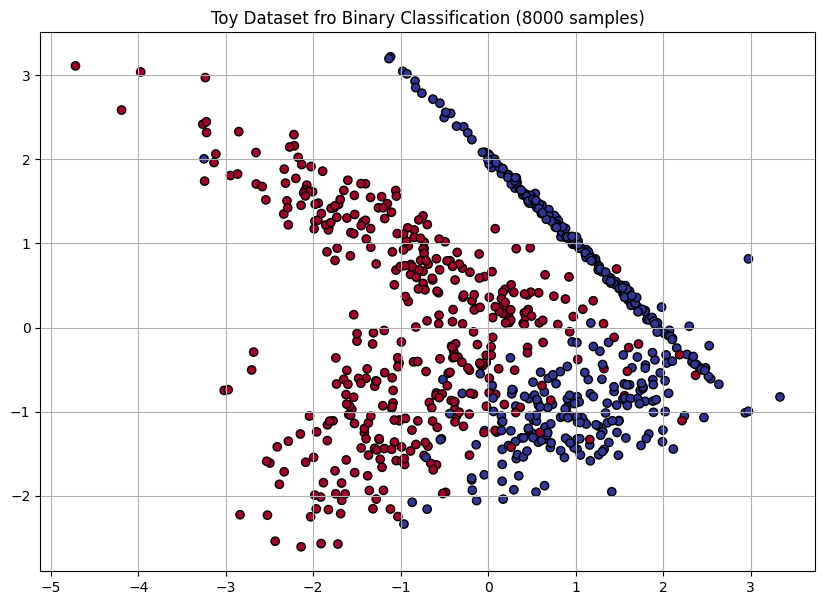

In [ ]:
# Visualize the plot
plt.figure(figsize =(10,7))
plt.scatter(X_train[:,0], X_train[:,1], c =y_train , cmap = 'RdYlBu', marker ='o', edgecolor = 'black' )
plt.title('Toy Dataset fro Binary Classification (8000 samples)')
plt.grid(True)
plt.show();

## Input and Output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape,  y.shape

((1000, 2), (1000,))

In [ ]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first examples
X_train[0], y_train[0]

(array([-1.18719273, -1.43694584]), 0)

## Creating models

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Nadam(),
                metrics = ['accuracy'])

# 3. Fit the model
history_1 = model_1.fit(X_train,y_train, epochs =5)

Epoch 1/5
25/25 [==============================] - 1s 2ms/step - loss: 7.6242 - accuracy: 0.3487
Epoch 2/5
25/25 [==============================] - 0s 2ms/step - loss: 7.5582 - accuracy: 0.3537
Epoch 3/5
25/25 [==============================] - 0s 2ms/step - loss: 7.4652 - accuracy: 0.3663
Epoch 4/5
25/25 [==============================] - 0s 2ms/step - loss: 7.4205 - accuracy: 0.3800
Epoch 5/5
25/25 [==============================] - 0s 2ms/step - loss: 7.3908 - accuracy: 0.3825


In [ ]:
# Train our model for longer
model_1.fit(X_train,y_train , epochs = 200 , verbose = 0)
model_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5003 - accuracy: 0.8350


[0.5003417730331421, 0.8349999785423279]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

# 3. Fit the model
history_2 = model_2.fit(X_train,y_train, epochs =10, verbose =0)

In [ ]:
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 4.2802 - accuracy: 0.7150


[4.280215740203857, 0.7149999737739563]

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


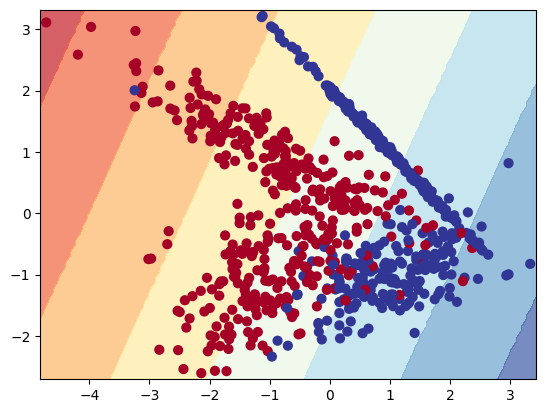

In [ ]:
plot_decision_boundary(model = model_2,
                       X=X_train,
                       y=y_train)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

# 3. Fit the model
history_3 = model_3.fit(X_train,y_train, epochs =10, verbose =0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 2.9080 - accuracy: 0.8050


[2.9079771041870117, 0.8050000071525574]

In [ ]:
model_1.summary()

Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_191 (Dense)           (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_192 (Dense)           (None, 1)                 3         
                                                                 
 dense_193 (Dense)           (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_194 (Dense)           (None, 100)               300       
                                                                 
 dense_195 (Dense)           (None, 100)               10100     
                                                                 
 dense_196 (Dense)           (None, 1)                 101       
                                                                 
Total params: 10501 (41.02 KB)
Trainable params: 10501 (41.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

# 3. Fit the model
history_4 = model_4.fit(X_train,y_train, epochs =500, verbose =0)

In [ ]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6970 - accuracy: 0.5010


[7.697048664093018, 0.5009999871253967]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr =0.001),
                metrics = ['accuracy'])

# 3. Fit the model
history_5 =model_5.fit(X_train,y_train, epochs =100, verbose =0)

In [ ]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9500


[0.1501537561416626, 0.949999988079071]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr =0.01),
                metrics = ['accuracy'])

# 3. Fit the model
history_6 =model_6.fit(X_train,y_train, epochs =600, verbose =0)

## Evaluating and improving our classification model

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.8350
Model loss on the test set: 0.5003417730331421
Model accuracy on the test set: 83.50%


In [ ]:
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 4.2802 - accuracy: 0.7150
Model loss on the test set: 4.280215740203857
Model accuracy on the test set: 71.50%


In [ ]:
loss, accuracy = model_3.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 3.1606 - accuracy: 0.7900
Model loss on the test set: 3.1606087684631348
Model accuracy on the test set: 79.00%


In [ ]:
loss, accuracy = model_4.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 7.2497 - accuracy: 0.5300
Model loss on the test set: 7.249725818634033
Model accuracy on the test set: 53.00%


In [ ]:
loss, accuracy = model_5.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 7ms/step - loss: 0.1913 - accuracy: 0.9450
Model loss on the test set: 0.19129444658756256
Model accuracy on the test set: 94.50%


In [ ]:
loss, accuracy = model_6.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 1s 4ms/step - loss: 0.3018 - accuracy: 0.9150
Model loss on the test set: 0.3017795979976654
Model accuracy on the test set: 91.50%


In [ ]:
def plotting(model):
  plt.figure(figsize = (8,5))
  plt.subplot(1,2,1)
  plt.title("Train")
  plot_decision_boundary(model, X= X_train, y = y_train)
  plt.subplot(1,2,2)
  plt.title("Test")
  plot_decision_boundary(model, X= X_test, y = y_test)
  plt.show();


313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


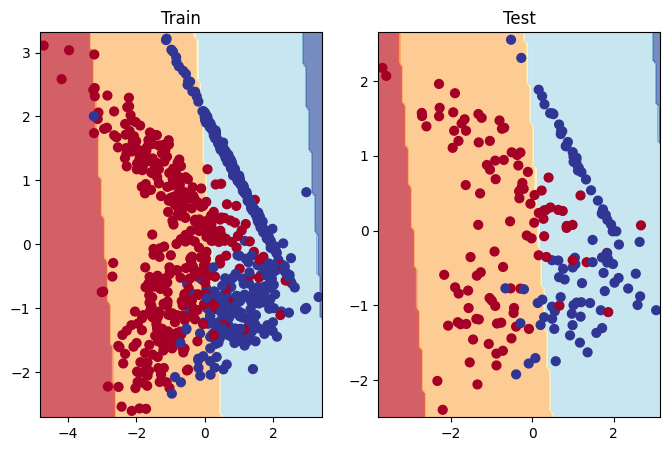

In [ ]:
# Plot the decision boundaries for the training and test setd
plotting(model_1)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


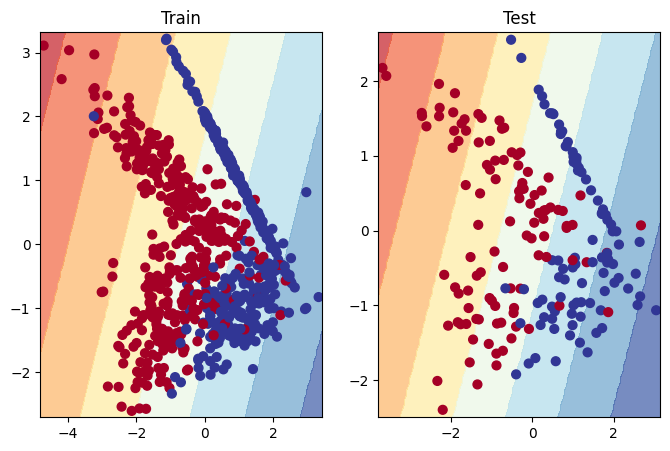

In [ ]:
plotting(model_2)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 2s 5ms/step
doing binary classifcation...


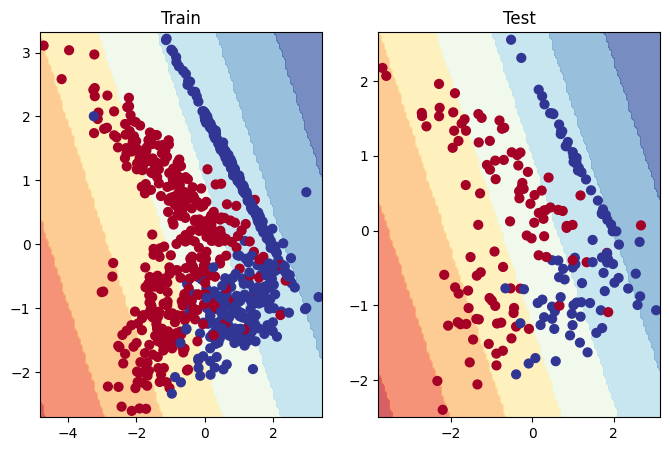

In [ ]:
plotting(model_3)

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


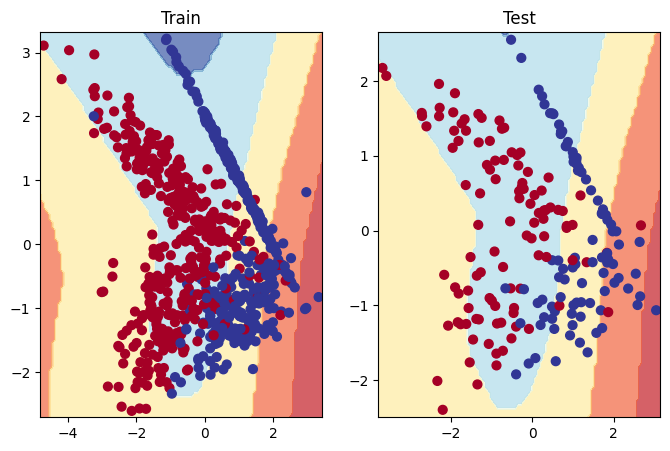

In [ ]:
plotting(model_4)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


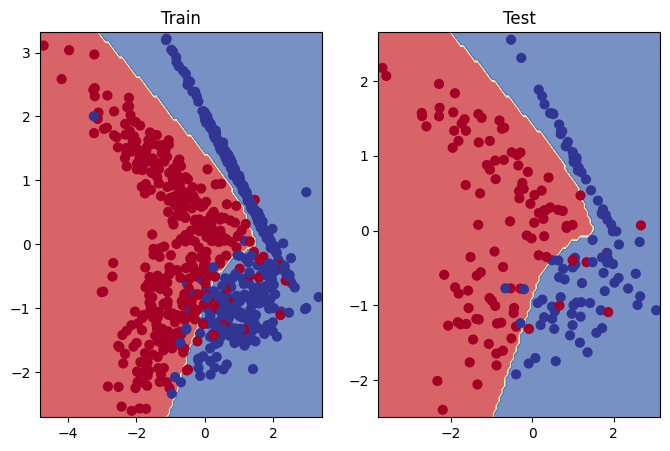

In [ ]:
plotting(model_5)

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


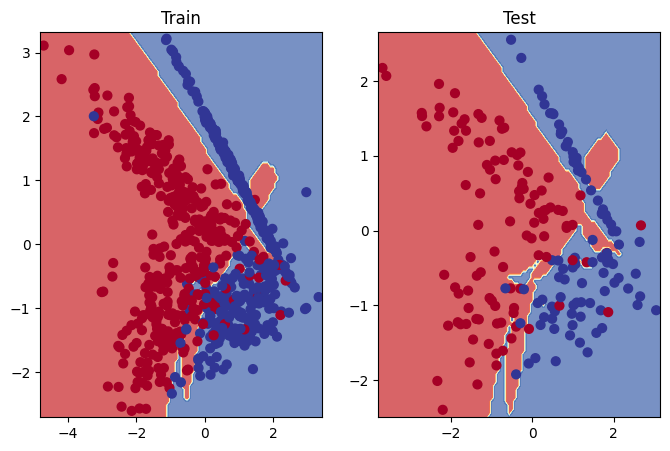

In [ ]:
plotting(model_6)

Text(0.5, 1.0, 'Model_1 training curve')

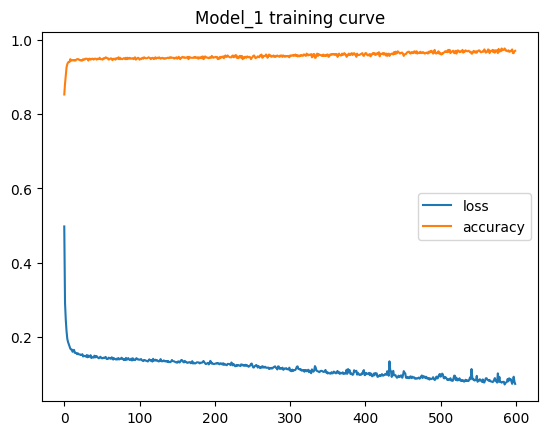

In [ ]:
# Plot the loss curve
pd.DataFrame(history_6.history).plot()
plt.title("Model_1 training curve")

## Finding the best learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
history_7 =model_7.fit(X_train,y_train, epochs =100, verbose =0, callbacks = [lr_scheduler])

<Axes: xlabel='epochs'>

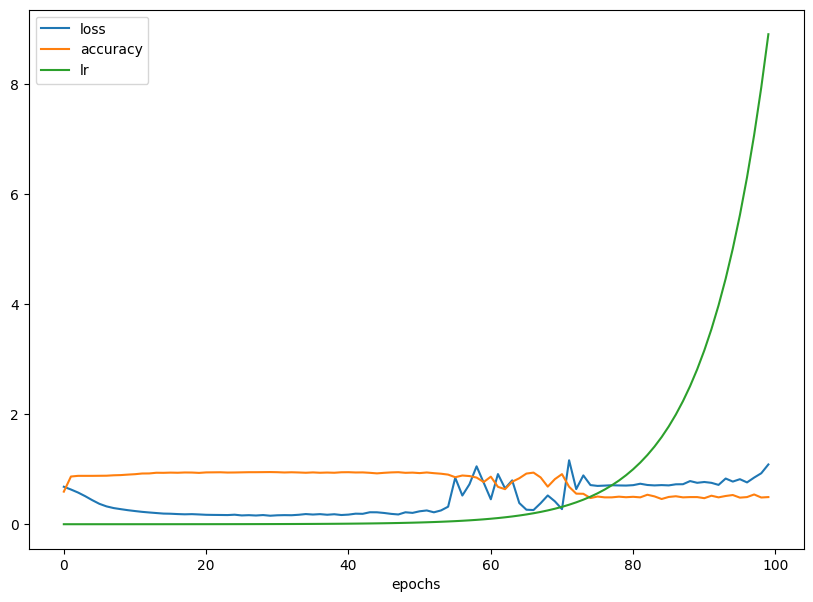

In [ ]:
# Check the history
pd.DataFrame(history_7.history).plot(figsize= (10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

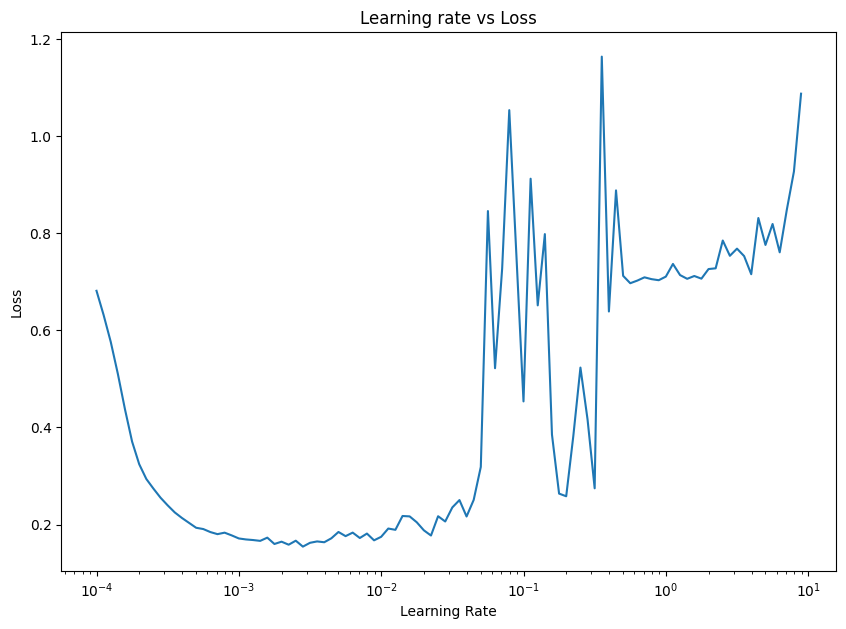

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_7.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [ ]:
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.7882 - accuracy: 0.4700
Model loss on the test set: 0.7882441878318787
Model accuracy on the test set: 47.00%


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


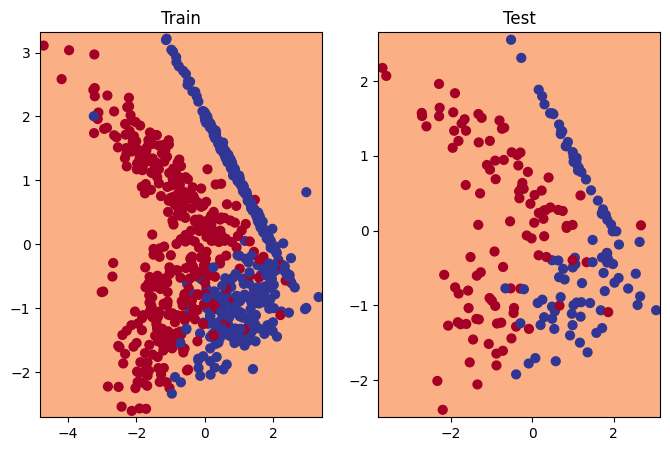

In [ ]:
plotting(model_7)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.1),
                metrics = ['accuracy'])

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
history_7 =model_7.fit(X_train,y_train, epochs =100, verbose =0)

In [ ]:
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.9450
Model loss on the test set: 0.17983375489711761
Model accuracy on the test set: 94.50%


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


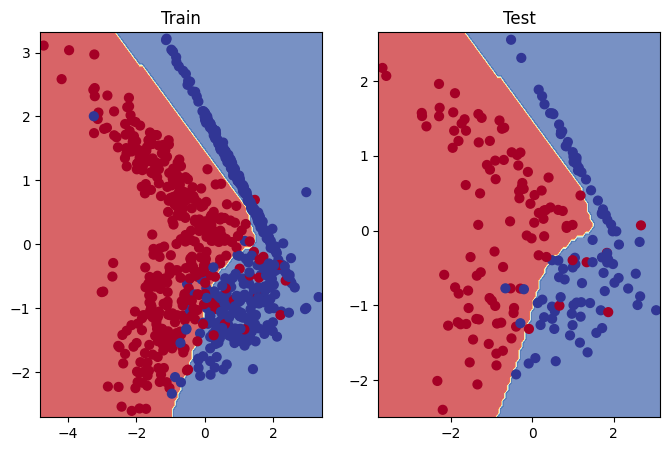

In [ ]:
plotting(model_7)